### More Important Functions
    value_counts()
    sort_values()
    rank()
    sort index()
    set index()
    rename index -> rename()
    reset index()
    unique() & nunique()
    isnull()/notnull()/hasnans()
    dropna()
    fillna()
    drop_duplicates()
    drop()
    apply()
    isin()
    corr()
    nlargest() -> nsmallest()
    insert()
    copy()

In [2]:
import numpy as np
import pandas as pd

In [4]:
# value_counts(): applicable for both Series and DataFrame
# Frequency count nikal ke btata hai.

marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
], columns = ['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [5]:
marks.value_counts()    # gives rows ka value count

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [36]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [7]:
# find which player has won most potm -> in finals and qualifiers

ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

# we can't apply string method directly (like .isdigit()) i.e. why we put .str here

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

<Axes: ylabel='count'>

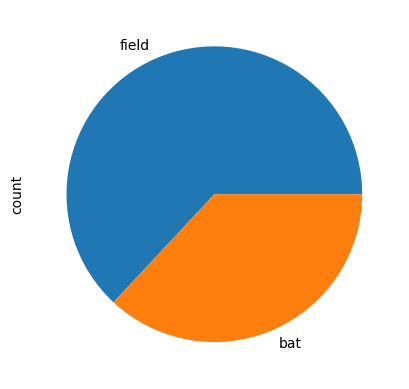

In [8]:
# Toss decision plot

ipl.head(2)
ipl['TossDecision'].value_counts().plot(kind = 'pie')

In [9]:
# how many matches each team has played

ipl.head(2)


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [10]:
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending = False)
# in this case dono indexes match karne chahiye like Mumbai Indians Team1 and Team2 dono me hona chahiye

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [11]:
# sort_values(Series and DataFrame) -> na_position -> inplace -> mulitple cols

x = pd.Series([12,4,34,23,67,90,3])
x

0    12
1     4
2    34
3    23
4    67
5    90
6     3
dtype: int64

In [12]:
x.sort_values(ascending = True)

6     3
1     4
0    12
3    23
2    34
4    67
5    90
dtype: int64

In [13]:
x.sort_values(ascending = False)

5    90
4    67
2    34
3    23
0    12
1     4
6     3
dtype: int64

In [236]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [15]:
# sort the data on the basis of name of the movie

movies.sort_values('title_x')    # display all movies names in ascending order for descending use ascending = FAlse

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [88]:
# creating own dataframe

students = pd.DataFrame(
    {
        'Name':['Anand','Nitish','Ankit',np.nan,'Rupesh',np.nan,'Mrityunjay',np.nan,'Aditya',np.nan],
        'College':['IIT',"BIT",'NIT',np.nan,np.nan,"LPU",'CU',np.nan,np.nan,'HPU'],
        'Branch':['MCA','EEE','CSE',np.nan,'ME','CE','IT','CIV','BIO',np.nan],
        'CGPA':[7.90,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'Package':[9,12,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [17]:
students.sort_values('Name')

,Name,College,Branch,CGPA,Package
8,Aditya,NaN,BIO,7.40,NaN
0,Anand,IIT,MCA,7.90,9.0
2,Ankit,NIT,CSE,6.41,6.0
6,Mrityunjay,CU,IT,7.40,8.0
1,Nitish,BIT,EEE,8.25,12.0
4,Rupesh,NaN,ME,5.60,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,LPU,CE,9.00,7.0
7,NaN,NaN,CIV,10.00,9.0
9,NaN,HPU,NaN,NaN,NaN


In [18]:
students.sort_values('Name',na_position='first')   # display nan values on the top

,Name,College,Branch,CGPA,Package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,LPU,CE,9.00,7.0
7,NaN,NaN,CIV,10.00,9.0
9,NaN,HPU,NaN,NaN,NaN
8,Aditya,NaN,BIO,7.40,NaN
0,Anand,IIT,MCA,7.90,9.0
2,Ankit,NIT,CSE,6.41,6.0
6,Mrityunjay,CU,IT,7.40,8.0
1,Nitish,BIT,EEE,8.25,12.0
4,Rupesh,NaN,ME,5.60,6.0


In [19]:
students.sort_values("Name",na_position='first',ascending=False)    # display nan values and then reverse alphabetical order

,Name,College,Branch,CGPA,Package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,LPU,CE,9.00,7.0
7,NaN,NaN,CIV,10.00,9.0
9,NaN,HPU,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
1,Nitish,BIT,EEE,8.25,12.0
6,Mrityunjay,CU,IT,7.40,8.0
2,Ankit,NIT,CSE,6.41,6.0
0,Anand,IIT,MCA,7.90,9.0
8,Aditya,NaN,BIO,7.40,NaN


In [20]:
#students.sort_values('Name', na_position = 'first', ascending=False, inplace = True)   # inplace = true make the changes permanent to the dataset

In [90]:
students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [22]:
# sorting on the basis of multiple columns

movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [23]:
movies.sort_values(['year_of_release','title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


In [24]:
movies.sort_values(['year_of_release','title_x'],ascending = [True,False])

# passing list with True,False values
# Ture: for year_of_release display them in ascending order
# False: for title_x; display them in descending order

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [25]:
# rank(): (applicable in Series type only not in dataframe)
# used to create new column for rankings in dataset

batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.sample(5)

,batter,batsman_run
54,AS Joseph,20
112,CJ Jordan,75
466,S Kaushik,0
241,JR Philippe,78
491,SE Rutherford,106


In [26]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending = False)   # creating new column batting_rank
batsman.head()
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [82]:
# sort_index(): applicable in both Series and DataFrame
# sort_index, index ko sort krta hai like sort_values(), values ko sort krta hai

marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [28]:
marks_series.sort_index()

english     57
hindi      100
maths       67
science     89
dtype: int64

In [29]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [238]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [31]:
# set_index(): applicable only in dataframe -> inplace
# set_index(): 

batsman
batsman.set_index('batter',inplace = True)   # make passed column to index but it's not permanent, do permanent using inplace = true

In [32]:
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [33]:
# reset_index() -> drop parameter: applicable on both in Series and DataFrame
# set_index() ka theek ulta krrta reset_index() means index ko wapis column bna deta hai

batsman.reset_index('batter')    # again this is not permanent change
# batsman.reset_index('batter',inplace = True)   for permanent change

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [34]:
# how to replace existing index without loosing
batsman.set_index('batting_rank')       # but here you can loose the previous index (in this case, batter)

,batsman_run
batting_rank,
166.5,280
226.0,161
535.0,4
329.0,53
402.5,25
...,...
594.0,0
343.0,47
547.5,3


In [35]:
# To avoid loosing this do this

batsman.reset_index().set_index('batting_rank')    # now no column will lost

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


In [87]:
# Convert Series to DataFrame using reset_index()

marks_series.reset_index()     # this outputs a dataframe as it was a series
#type(marks_series.reset_index())

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [107]:
# rename(): applicable only in DataFrame -> index
# rename() can be used to change the column name and index name as well

movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [101]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)

In [109]:
movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [119]:
# changing index names

movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'})

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [125]:
# unique(): only applicable in Series.
# returns unique values from a column in Series

temp = pd.Series([1,2,3,3,4,4,5,np.nan,np.nan,5])
print(temp)
temp.unique()    # display only unique values

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    5.0
7    NaN
8    NaN
9    5.0
dtype: float64


array([ 1.,  2.,  3.,  4.,  5., nan])

In [133]:
len(ipl['Season'].unique())

15

In [135]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [139]:
ipl['Season'].nunique()   # nunique directly gives you the numbers of unique values


15

In [141]:
# but ye nan values pe work nhi krta
temp = pd.Series([1,2,3,3,4,4,5,np.nan,np.nan,5])
print(temp)
temp.unique()

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    4.0
6    5.0
7    NaN
8    NaN
9    5.0
dtype: float64


array([ 1.,  2.,  3.,  4.,  5., nan])

In [145]:
len(temp.unique())    # gives 6 include nan values

6

In [149]:
temp.nunique()   # gives 5 because of nan is not included here

5

In [92]:
# isnull(): applicable on both Series and DataFrame
# checks for missing values

students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [167]:
students['Name'].isnull()
# isnull return a boolean series agr value missing hoga to True and agr nahi hoga to False se replace kr dega

students['Name'][students['Name'].isnull()]   # only show missing values

3    NaN
5    NaN
7    NaN
9    NaN
Name: Name, dtype: object

In [173]:
# notnull(): applicable on both Series and DataFrame
# just opposite to isnull()
# agr missing value hoga to False dega and agr missing value nhi hoga to True dega

students['Name'].notnull()

students['Name'][students['Name'].notnull()]

0         Anand
1        Nitish
2         Ankit
4        Rupesh
6    Mrityunjay
8        Aditya
Name: Name, dtype: object

In [187]:
# hasnan: applicable only in Series
# tells ki aapke column mein koi bhi missing value hai ya nhi
students['Name'].hasnans

True

In [189]:
students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [191]:
students.isnull()

,Name,College,Branch,CGPA,Package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


In [193]:
students.notnull()

,Name,College,Branch,CGPA,Package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


In [200]:
# dropna(): applicable on Series and Dataframe
# used to deal with missing values, you can drop all missing values using dropna()

students['Name'].dropna()    # removes all missing values

0         Anand
1        Nitish
2         Ankit
4        Rupesh
6    Mrityunjay
8        Aditya
Name: Name, dtype: object

In [208]:
students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [206]:
# how to apply on dataframe
students.dropna()   # kisi bhi row me agr ek bhi missing value hogi to poori row ko remove kr dega

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
6,Mrityunjay,CU,IT,7.40,8.0


In [210]:
# remove only those rows in which sari ki sari values missing hain
students.dropna(how='all')

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [212]:
# removes on the basis of particular column/columns
students.dropna(subset=['Name'])   # removes those rows in name column in which missing values

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
4,Rupesh,NaN,ME,5.60,6.0
6,Mrityunjay,CU,IT,7.40,8.0
8,Aditya,NaN,BIO,7.40,NaN


In [214]:
# remove rows or colmns in which there are missing values
students.dropna(subset=['Name','College'])   

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
6,Mrityunjay,CU,IT,7.40,8.0


In [216]:
# fillna(): applicable on both Series and Dataframe
# fill the missing values with given values to parameter

students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [220]:
students['Name'].fillna('unknown')

0         Anand
1        Nitish
2         Ankit
3       unknown
4        Rupesh
5       unknown
6    Mrityunjay
7       unknown
8        Aditya
9       unknown
Name: Name, dtype: object

In [224]:
students.fillna(0)

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,0,0,0,0.00,0.0
4,Rupesh,0,ME,5.60,6.0
5,0,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,0,0,CIV,10.00,9.0
8,Aditya,0,BIO,7.40,0.0
9,0,HPU,0,0.00,0.0


In [226]:
students['Package'].fillna(students['Package'].mean())

0     9.000000
1    12.000000
2     6.000000
3     8.142857
4     6.000000
5     7.000000
6     8.000000
7     9.000000
8     8.142857
9     8.142857
Name: Package, dtype: float64

In [232]:
students['Name'].fillna(method='ffill')   # ffill = forward fill (fill the the previous value before the missing value)

C:\Users\Anand S\AppData\Local\Temp\ipykernel_9988\3829848071.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['Name'].fillna(method='ffill')   # ffill = forward fill (fill the the previous value before the missing value)


0         Anand
1        Nitish
2         Ankit
3         Ankit
4        Rupesh
5        Rupesh
6    Mrityunjay
7    Mrityunjay
8        Aditya
9        Aditya
Name: Name, dtype: object

In [234]:
# backward fill (bfill): fills the missing value with next value
students['Name'].fillna(method='bfill')

C:\Users\Anand S\AppData\Local\Temp\ipykernel_9988\2076100435.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['Name'].fillna(method='bfill')


0         Anand
1        Nitish
2         Ankit
3        Rupesh
4        Rupesh
5    Mrityunjay
6    Mrityunjay
7        Aditya
8        Aditya
9           NaN
Name: Name, dtype: object

In [10]:
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
], columns=['iq','marks','package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [16]:
# works like duplicated()
marks.duplicated()
marks.duplicated().sum()

1

In [20]:
# drop_duplicates(): applicable on Series and Dataframe
# drop_duplicates() helps you to remove duplicate rows

temp = pd.Series([1,1,1,2,2,3,4,4,4,5])
temp.drop_duplicates()

0    1
3    2
5    3
6    4
9    5
dtype: int64

In [22]:
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [26]:
marks.drop_duplicates()     # drop 4th row

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [32]:
# keep parameter: you can keep first or last occurence
marks.drop_duplicates(keep='first')    # it is default removes 4th and keep 3rd
marks.drop_duplicates(keep='last')   # keep 4th row and delete 3rd row

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


In [42]:
# find the last match played by virat kohli in Delhi
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [46]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ..."


In [48]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list

In [54]:
did_kohli_play(['R Sharma','S Dhawan','V Kohli'])
did_kohli_play(['R Sharma','S Dhawan'])

False

In [56]:
ipl['all_players'].apply(did_kohli_play)

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: all_players, Length: 950, dtype: bool

In [58]:
ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...",False
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...",True
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...",False
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...",False


In [70]:
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)]


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True
269,1136605,Delhi,2018-05-12,2018,45,Delhi Daredevils,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,...,Wickets,5.0,NaN,AB de Villiers,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...","['PA Patel', 'MM Ali', 'V Kohli', 'AB de Villi...",KN Ananthapadmanabhan,HDPK Dharmasena,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...",True
318,1082646,Delhi,2017-05-14,2017,56,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,bat,...,Runs,10.0,NaN,HV Patel,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['CH Gayle', 'Vishnu Vinod', 'V Kohli', 'TM He...",CK Nandan,C Shamshuddin,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...",True
467,829757,Delhi,2015-04-26,2015,26,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,10.0,NaN,VR Aaron,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...",M Erasmus,S Ravi,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...",True
571,598054,Delhi,2013-05-10,2013,57,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,4.0,NaN,JD Unadkat,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...","['CA Pujara', 'CH Gayle', 'V Kohli', 'MC Henri...",NJ Llong,K Srinath,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...",True
638,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,21.0,NaN,CH Gayle,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",HDPK Dharmasena,C Shamshuddin,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...",True
746,501227,Delhi,2011-04-26,2011,30,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,3.0,NaN,V Kohli,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",S Asnani,RJ Tucker,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...",True
801,419140,Delhi,2010-04-04,2009/10,35,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,bat,...,Runs,37.0,NaN,PD Collingwood,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...","['JH Kallis', 'CL White', 'KP Pietersen', 'RV ...",BF Bowden,M Erasmus,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...",True
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...",True


In [72]:
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)].drop_duplicates(subset = ['City','did_kohli_play'],keep = 'first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [76]:
# drop(): applicable on both Series and Dataframe
# drop() drops the rows and columns.

temp = pd.Series([10,2,3,16,45,78,10])
temp.drop(index = [0,5]) # drops 0 and 5th index item

1     2
2     3
3    16
4    45
6    10
dtype: int64

In [96]:
students

,Name,College,Branch,CGPA,Package
0,Anand,IIT,MCA,7.90,9.0
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
8,Aditya,NaN,BIO,7.40,NaN
9,NaN,HPU,NaN,NaN,NaN


In [103]:
# let's want to drop branch and cgpa column

students.drop(columns = ['Branch','CGPA'])

,Name,College,Package
0,Anand,IIT,9.0
1,Nitish,BIT,12.0
2,Ankit,NIT,6.0
3,NaN,NaN,NaN
4,Rupesh,NaN,6.0
5,NaN,LPU,7.0
6,Mrityunjay,CU,8.0
7,NaN,NaN,9.0
8,Aditya,NaN,NaN
9,NaN,HPU,NaN


In [107]:
# let's drop rows (0,8) index position
students.drop(index = [0,8])

,Name,College,Branch,CGPA,Package
1,Nitish,BIT,EEE,8.25,12.0
2,Ankit,NIT,CSE,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rupesh,NaN,ME,5.60,6.0
5,NaN,LPU,CE,9.00,7.0
6,Mrityunjay,CU,IT,7.40,8.0
7,NaN,NaN,CIV,10.00,9.0
9,NaN,HPU,NaN,NaN,NaN


In [113]:
students.set_index('Name').drop(index = ['Nitish','Rupesh'])

,College,Branch,CGPA,Package
Name,,,,
Anand,IIT,MCA,7.90,9.0
Ankit,NIT,CSE,6.41,6.0
NaN,NaN,NaN,NaN,NaN
NaN,LPU,CE,9.00,7.0
Mrityunjay,CU,IT,7.40,8.0
NaN,NaN,CIV,10.00,9.0
Aditya,NaN,BIO,7.40,NaN
NaN,HPU,NaN,NaN,NaN


In [119]:
# apply(): applicable on both Series and Dataframe
temp = pd.Series([10,20,30,40,50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [123]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [125]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [117]:
# apply() with dataframe

points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [137]:
def euclidean(row):
    pt_A = row['1st point']
    pt_B = row['2nd point']

    return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5
    

In [139]:
points_df['distance'] = points_df.apply(euclidean,axis=1)

In [141]:
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
